**Lasso Regression:**

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

**w = w - α*dw**

**b = b - α*db**

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

Gradient for Weights:

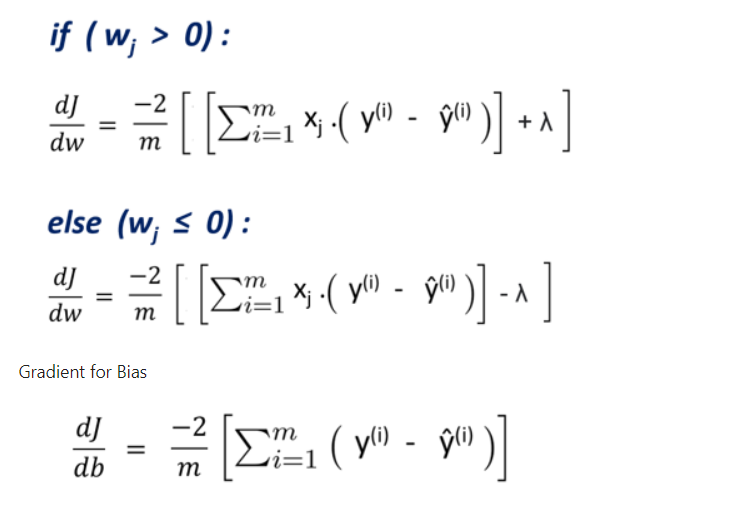

In [ ]:
import numpy as np

#Lasso Regression model:

In [ ]:
class Lasso_Regression():

    #initializing the hyper parameters
    def __init__(self,learning_rate,no_of_iterations,lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter

    def fit(self,x,y):
        # no. of features and no. of data points
        if len(x.shape) == 1:
            self.m = x.shape[0]
            self.n = 1
        else:
            self.m , self.n = x.shape

        self.w = np.zeros(self.n)
        self.b = 0

        self.x = x
        self.y = y

        #gradient descent process
        for i in range(self.no_of_iterations):
            self.update_parameters()

    def update_parameters(self):

        y_pred = self.predict(self.x)

        #gradient for weights
        dw = np.zeros(self.n)

        for i in range(self.n):

            if self.w[i] > 0:
                dw[i] = -( 2*( self.x[:,i].dot(self.y - y_pred) + self.lambda_parameter ) / self.m )
            else:
                dw[i] = -( 2*( self.x[:,i].dot(self.y - y_pred) - self.lambda_parameter ) / self.m )

        #gradient for bias
        db = -(2 * np.sum(self.y - y_pred) / self.m)

    def predict(self,x):
        return (x.dot(self.w) + self.b)



#Using this model:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
salary_data = pd.read_csv('/content/salary_data.csv')

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.shape

(30, 2)

In [ ]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
features = salary_data.iloc[:,:-1].values
target = salary_data.iloc[:,1].values

In [ ]:
print(features)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(target)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size = 0.33, random_state=2)

In [ ]:
model = Lasso_Regression(learning_rate = 0.02, no_of_iterations=1000,lambda_parameter=200)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
test_data_pred = model.predict(x_test)

In [ ]:
print(test_data_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
